In [3]:
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as mpl
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

In [5]:
data = pd.read_csv('[1h]BTCUSDT.csv')
print(data.head())

           Start           Stop     Open    Close      Low     High     Volume
0  1502942400000  1502945999999  4261.48  4308.83  4261.32  4313.62  47.181009
1  1502946000000  1502949599999  4308.83  4315.32  4291.37  4328.69  23.234916
2  1502949600000  1502953199999  4330.29  4324.35  4309.37  4345.45   7.229691
3  1502953200000  1502956799999  4316.62  4349.99  4287.41  4349.99   4.443249
4  1502956800000  1502960399999  4333.32  4360.69  4333.32  4377.85   0.972807


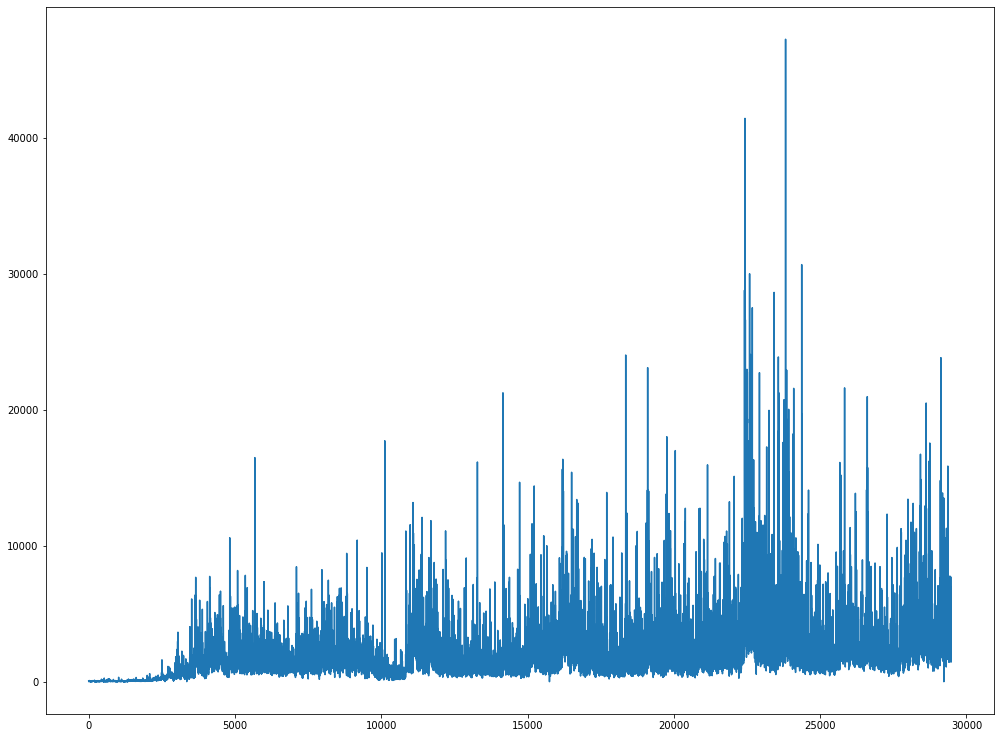

In [4]:
mpl.figure(figsize=(17,13))
mpl.plot(data.Volume)

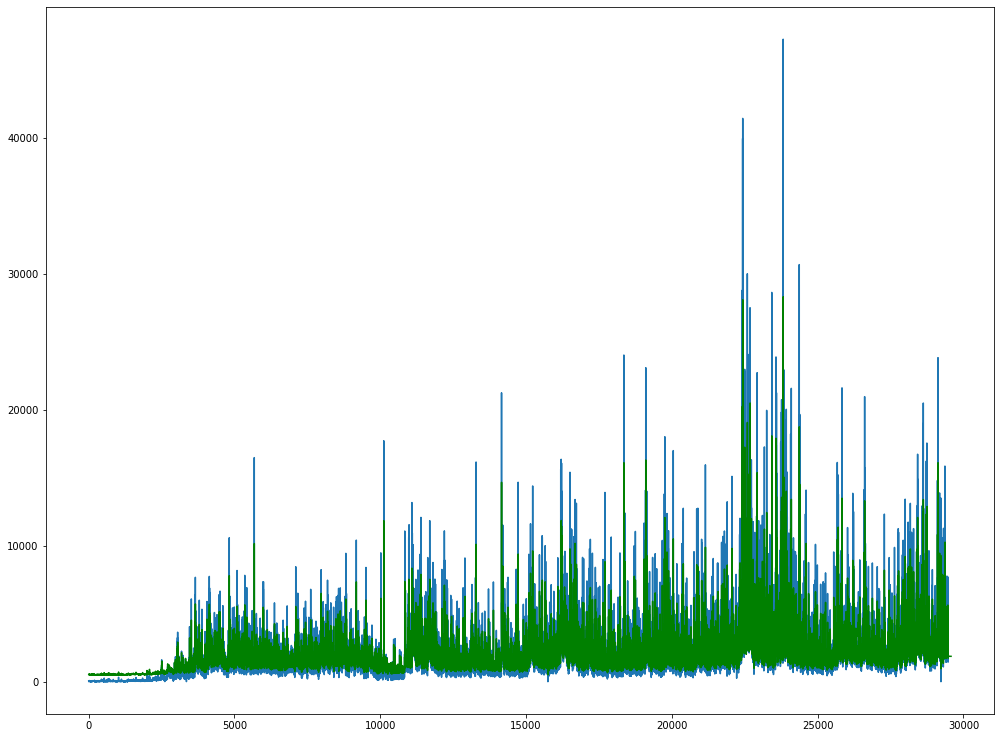

In [13]:
#AR
mod = AutoReg(data.Volume, lags=2,old_names = False)
yhat1 = mod.fit().predict(0, len(data.Volume)+100)
mpl.figure(figsize=(17,13))
mpl.plot(data.Volume)
mpl.plot(yhat1, 'green')

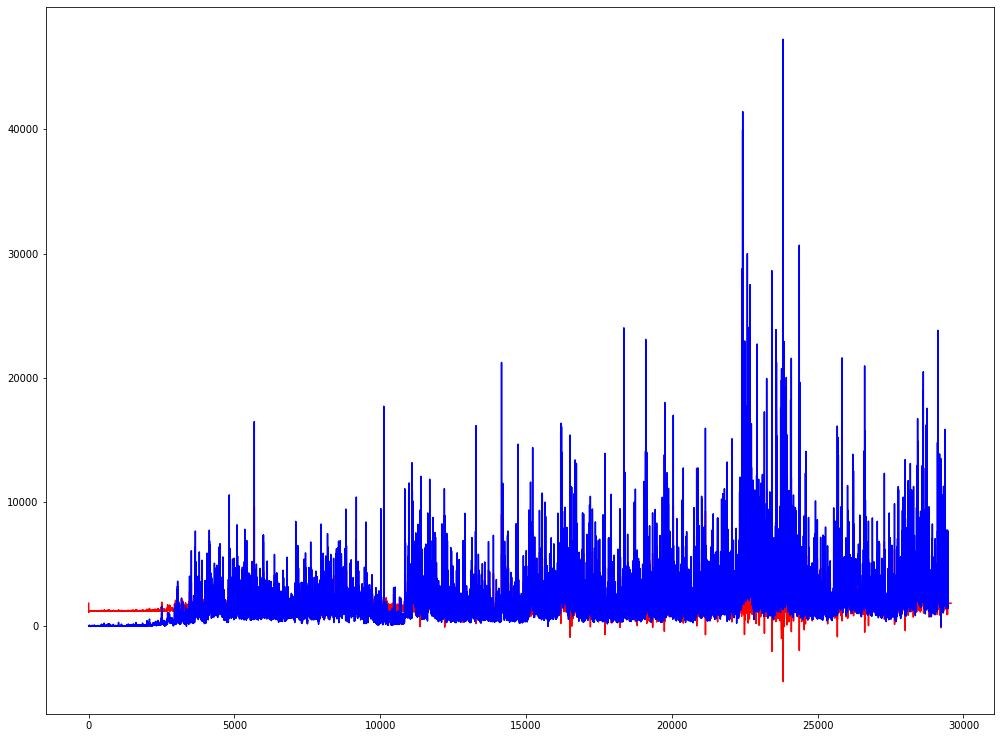

In [14]:
#MA
mod = ARIMA(data.Volume, order=(0, 0, 1))
yhat2 = mod.fit().predict(0, len(data.Volume) + 100)
mpl.figure(figsize=(17,13))
mpl.plot(range(len(yhat2)), yhat2, c='red', label='')
mpl.plot(range(len(data.Volume)), data.Volume, c='green', label='Groundtruth')
mpl.show()

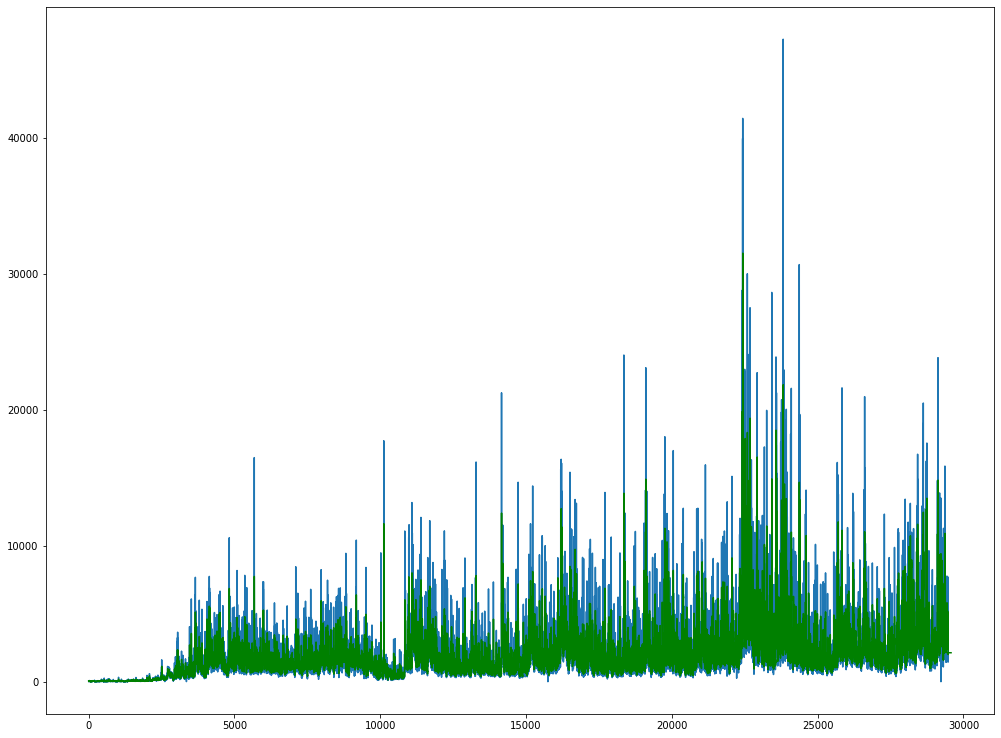

In [17]:
#SES
mod = SimpleExpSmoothing(data.Volume, initialization_method=None)
yhat3 = mod.fit().predict(0, len(data.Volume)+100)
mpl.figure(figsize=(17,13))
mpl.plot(data_h.Volume)
mpl.plot(yhat3, 'green')

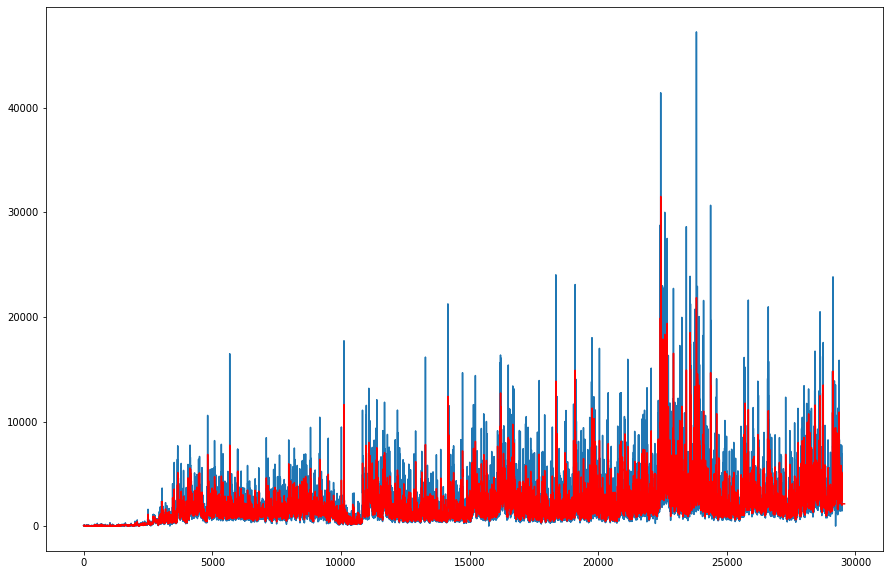

In [18]:
#HWES
mod = ExponentialSmoothing(data.Volume)
yhat4 = mod.fit().predict(0, len(data.Volume)+100)
mpl.figure(figsize=(15,10))
mpl.plot(data.Volume)
mpl.plot(yhat4, 'red')